In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hinge_loss
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractional_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractional_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractional_dimension_worst"]
print(len(names))
df = pd.read_csv(r'Breast Cancer.csv',header=1,delim_whitespace=False,names=names)
#print(df.head())
#print(df.shape)

32


In [3]:
#Dropping rows with no values
df1 = df.dropna()

In [4]:
#Converting the dataframe into a numpy array
df2 = np.array(df)
#Shuffling the data
df3 = np.random.shuffle(df2)

In [5]:
#Isolating the X and Y arrays
x1 = df2[:,0]
x1 = x1.reshape((x1.shape[0], 1))
x2 = df2[:,2:]
#X = np.hstack((x1,x2)) No need to include the ID 
X = np.array(x2)
#print(X[:5])
Y = []
Y_svm = [] # we will be using this to calculate the hinge loss for SVMs
X_malignant = []
X_benign = []
Y_mal = []
Y_ben = []
for diagnosis in range(len(df2)):
    if df2[diagnosis][1] == "M":
        Y.append(1)
        Y_svm.append(1)
        X_malignant.append(df2[diagnosis])
    else:
        Y.append(0)
        Y_svm.append(-1)
        X_benign.append(df2[diagnosis])
Y = np.array(Y)
X_malignant = np.array(X_malignant)
X_benign = np.array(X_benign)
x_scale = preprocessing.scale(X)

Unsupervised Analysis: Maybe the Radius Mean and the texture mean are the two most important features and can help separate the data

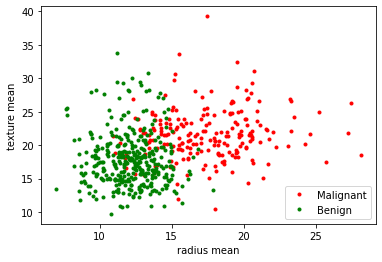

In [6]:
plt.plot(X_malignant[:,2],X_malignant[:,3],'r.')
plt.plot(X_benign[:,2],X_benign[:,3], 'g.')
plt.xlabel("radius mean")
plt.ylabel("texture mean")
plt.legend(['Malignant', 'Benign'], loc='lower right')

Unsupervised Analysis: Here we just transformed our data a little bit and plot the cubes of the two features to see if they separate better

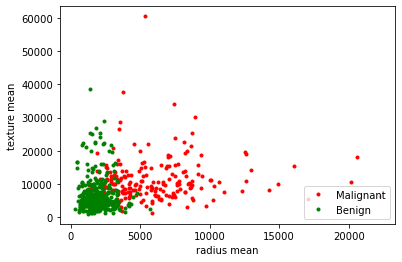

In [7]:
plt.plot(np.power(X_malignant[:,2],3),np.power(X_malignant[:,3],3),'r.')
plt.plot(np.power(X_benign[:,2],3),np.power(X_benign[:,3],3), 'g.')
plt.xlabel("radius mean")
plt.ylabel("texture mean")
plt.legend(['Malignant', 'Benign'], loc='lower right')

In [8]:
#splitting the data into training and test data (training data ~ 75% and test data ~ 25%)
X_train = x_scale[:426]
Y_train = Y[:426]
Y_train_svm = Y_svm[:426]
X_test = x_scale[426:]
Y_test = Y[426:]
Y_test_svm = Y_svm[426:]

# Logistic Regression

# Logistic Regression with L1 regularization

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.863850
Accuracy on test data = 0.811189
False Negatives:  27 	 True Positives:  29
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.969484
Accuracy on test data = 0.951049
False Negatives:  7 	 True Positives:  49
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.992958
Accuracy on test data = 0.958042
False Negatives:  6 	 True Positives:  50
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.995305
Accuracy on test data = 0.958042
False Negatives:  6 	 True Positives:  50
True Negatives:  87 	 False Positives:  0


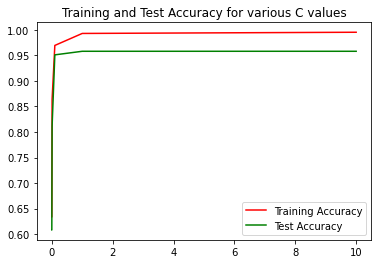

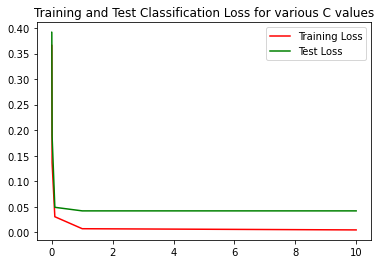

In [9]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []
train_logreg_coeff = []
test_logreg_coeff = []
#we will record the precision,recall and fscore for each of the models and add to these lists
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
#we will record the classification loss (fraction of misclassified labels) for each model and add to this list
#We will be using the zero_one_loss function from sklearn.metrics for this
classification_loss_train = [] 
classification_loss_test = []
#models_list = ['Logreg with L1','Logreg with L2','Logreg with L1 (Transformed, deg2)','Logreg with L2 (Transformed, deg2)','Logreg with L1 (Transformed, deg3)','Logreg with L2 (Transformed, deg3)']

def logreg_model(c,X_train,Y_train,X_test,Y_test):
    logreg = linear_model.LogisticRegression(penalty = 'l1' , C = c , solver = 'saga')
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    prec_train , recal_train , fscore_train,_ = precision_recall_fscore_support(Y_train, Yhat_train,average = 'binary')
    precision_list_train.append((c,prec_train))
    recall_list_train.append((c,recal_train))
    fscore_list_train.append((c,fscore_train))
    classification_loss_train.append(zero_one_loss(Y_train,Yhat_train))
    #which model's coefficients because it takes no parameters?
    #how to illustrate through graphs?
    #train_logreg_coeff.append(logreg.coef_)
    
    print("Accuracy on training data = %f" % acc_train)
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    prec , recal , fscore,_ = precision_recall_fscore_support(Y_test, Yhat_test,average='binary')
    precision_list_test.append((c,prec))
    recall_list_test.append((c,recal))
    fscore_list_test.append((c,fscore))
    classification_loss_test.append(zero_one_loss(Y_test,Yhat_test))
    test_logreg_coeff.append(logreg.coef_)
    print("Accuracy on test data = %f" % acc_test) 
    c_logreg.append(c)
    
    con_matrix = confusion_matrix(Y_test,logreg.predict(X_test))
    print("False Negatives: ",con_matrix[1][0],'\t',"True Positives: ",con_matrix[1][1])
    print("True Negatives: ",con_matrix[0][0],'\t',"False Positives: ",con_matrix[0][1])
    
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
#Plotting train and test accuracy
plt.plot(c_logreg,acc_train_logreg,'r')
plt.plot(c_logreg,acc_test_logreg,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg,classification_loss_train,'r')
plt.plot(c_logreg,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

#Precision and Recall to be included?

#print("Train recall with the C values:",recall_list_train)
#print("Test recall with the C values:",recall_list_test)
#print("Train precision with the C values:",precision_list_train)
#print("Test precision with the C values:",precision_list_test)



# Logistic Regression with L2 Regularization

Accuracy on training data = 0.647887
False Negatives:  54 	 True Positives:  2
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.622378
Accuracy on training data = 0.899061
False Negatives:  20 	 True Positives:  36
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.860140
Accuracy on training data = 0.960094
False Negatives:  11 	 True Positives:  45
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.923077
Accuracy on training data = 0.985915
False Negatives:  6 	 True Positives:  50
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.958042
Accuracy on training data = 0.995305
False Negatives:  6 	 True Positives:  50
True Negatives:  86 	 False Positives:  1
Accuracy on test data = 0.951049
Accuracy on training data = 0.995305
False Negatives:  6 	 True Positives:  50
True Negatives:  86 	 False Positives:  1
Accuracy on test data = 0.951049


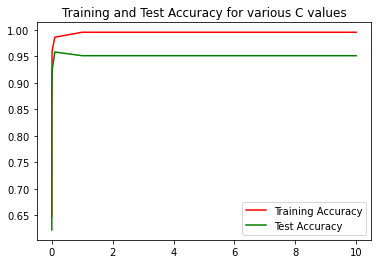

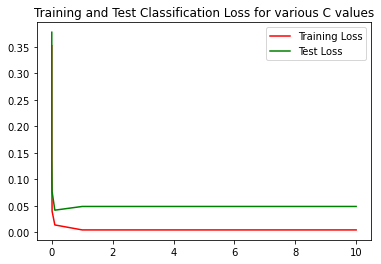

In [10]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
train_logreg2_coeff = []
test_logreg2_coeff = []
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
classification_loss_train = [] 
classification_loss_test = []
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C = c)
    logreg2.fit(X_train,Y_train)
    Yhat_train = logreg2.predict(X_train)
    acc_train = logreg2.score(X_train,Y_train)
    acc_train_logreg2.append(acc_train)
    prec_train , recal_train , fscore_train,_ = precision_recall_fscore_support(Y_train, Yhat_train)
    precision_list_train.append((c,prec_train))
    recall_list_train.append((c,recal_train))
    fscore_list_train.append((c,fscore_train))
    classification_loss_train.append(zero_one_loss(Y_train,Yhat_train))
    
    #train_logreg2_coeff.append(logreg.coef_)
    print("Accuracy on training data = %f" % acc_train)
    Yhat_test = logreg2.predict(X_test)
    acc_test = logreg2.score(X_test,Y_test)
    acc_test_logreg2.append(acc_test)
    prec , recal , fscore,_ = precision_recall_fscore_support(Y_test, Yhat_test)
    precision_list_test.append((c,prec))
    recall_list_test.append((c,recal))
    fscore_list_test.append((c,fscore))
    classification_loss_test.append(zero_one_loss(Y_test,Yhat_test))
    con_matrix = confusion_matrix(Y_test,logreg2.predict(X_test))
    print("False Negatives: ",con_matrix[1][0],'\t',"True Positives: ",con_matrix[1][1])
    print("True Negatives: ",con_matrix[0][0],'\t',"False Positives: ",con_matrix[0][1])
    
    #test_logreg2_coeff.append(logreg.coef_)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg2.append(c)
    
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test) 
    
#Plotting train and test accuracy
plt.plot(c_logreg2,acc_train_logreg2,'r')
plt.plot(c_logreg2,acc_test_logreg2,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg2,classification_loss_train,'r')
plt.plot(c_logreg2,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Logistic Regression with Feature Transformation

# Logistic Regression with L1 Regularization (Transformed Features, Degree 2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.941315
Accuracy on test data = 0.902098
False Negatives:  13 	 True Positives:  43
True Negatives:  86 	 False Positives:  1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.957746
Accuracy on test data = 0.944056
False Negatives:  7 	 True Positives:  49
True Negatives:  86 	 False Positives:  1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.960094
Accuracy on test data = 0.944056
False Negatives:  8 	 True Positives:  48
True Negatives:  87 	 False Positives:  0
Accuracy on training data = 0.960094
Accuracy on test data = 0.944056
False Negatives:  8 	 True Positives:  48
True Negatives:  87 	 False Positives:  0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


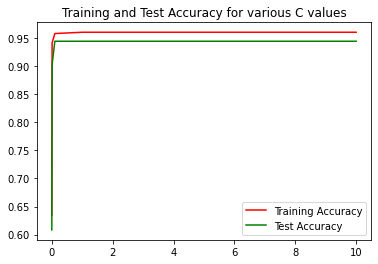

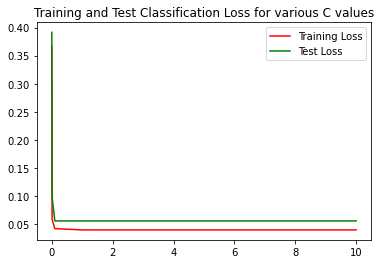

In [12]:
poly = PolynomialFeatures(2)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
acc_train_logreg = []
acc_test_logreg = []
train_logreg_coeff = []
test_logreg_coeff = []
c_logreg = []
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
classification_loss_train = [] 
classification_loss_test = []

for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
#Plotting train and test accuracy
plt.plot(c_logreg,acc_train_logreg,'r')
plt.plot(c_logreg,acc_test_logreg,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg,classification_loss_train,'r')
plt.plot(c_logreg,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# Logistic Regression with L2 Regularization (Transformed Features, Degree 2)

Accuracy on training data = 0.741784
False Negatives:  39 	 True Positives:  17
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.727273
Accuracy on training data = 0.889671
False Negatives:  22 	 True Positives:  34
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.846154
Accuracy on training data = 0.967136
False Negatives:  11 	 True Positives:  45
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.923077
Accuracy on training data = 0.990610
False Negatives:  8 	 True Positives:  48
True Negatives:  86 	 False Positives:  1
Accuracy on test data = 0.937063
Accuracy on training data = 0.997653
False Negatives:  6 	 True Positives:  50
True Negatives:  85 	 False Positives:  2
Accuracy on test data = 0.944056
Accuracy on training data = 1.000000
False Negatives:  6 	 True Positives:  50
True Negatives:  85 	 False Positives:  2
Accuracy on test data = 0.944056


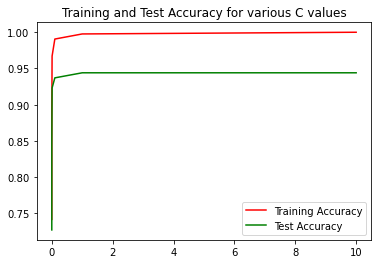

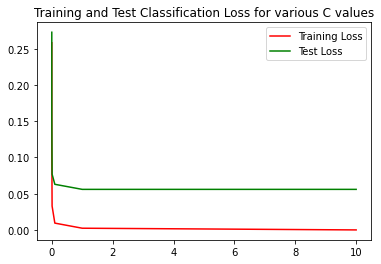

In [13]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
train_logreg2_coeff = []
test_logreg2_coeff = []
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
classification_loss_train = [] 
classification_loss_test = []

for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
plt.plot(c_logreg2,acc_train_logreg2,'r')
plt.plot(c_logreg2,acc_test_logreg2,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg2,classification_loss_train,'r')
plt.plot(c_logreg2,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# Logistic Regression with L1 Regularization (Transformed Features, Degree 3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on training data = 0.633803
Accuracy on test data = 0.608392
False Negatives:  56 	 True Positives:  0
True Negatives:  87 	 False Positives:  0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.948357
Accuracy on test data = 0.958042
False Negatives:  4 	 True Positives:  52
True Negatives:  85 	 False Positives:  2


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.967136
Accuracy on test data = 0.951049
False Negatives:  5 	 True Positives:  51
True Negatives:  85 	 False Positives:  2


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.967136
Accuracy on test data = 0.951049
False Negatives:  5 	 True Positives:  51
True Negatives:  85 	 False Positives:  2
Accuracy on training data = 0.967136
Accuracy on test data = 0.951049
False Negatives:  5 	 True Positives:  51
True Negatives:  85 	 False Positives:  2


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


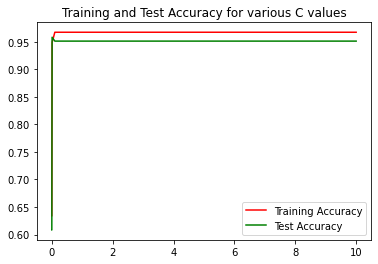

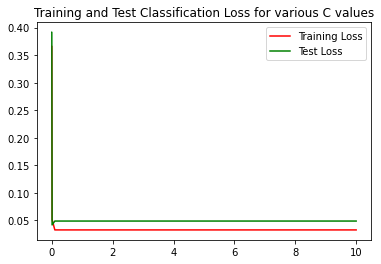

In [14]:
cube = PolynomialFeatures(3)
X_transformed_train1 = cube.fit_transform(X_train)
X_transformed_test1 = cube.fit_transform(X_test)
acc_train_logreg = []
acc_test_logreg = []
train_logreg_coeff = []
test_logreg_coeff = []
c_logreg = []
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
classification_loss_train = [] 
classification_loss_test = []

for c in cVals:
    logreg_model(c, X_transformed_train1, Y_train, X_transformed_test1, Y_test)
    
#Plotting train and test accuracy    
plt.plot(c_logreg,acc_train_logreg,'r')
plt.plot(c_logreg,acc_test_logreg,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg,classification_loss_train,'r')
plt.plot(c_logreg,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# Logistic Regression with L2 Regularization (Transformed Features, Degree 3)

Accuracy on training data = 0.903756
False Negatives:  22 	 True Positives:  34
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.846154
Accuracy on training data = 0.964789
False Negatives:  12 	 True Positives:  44
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.916084
Accuracy on training data = 0.990610
False Negatives:  10 	 True Positives:  46
True Negatives:  87 	 False Positives:  0
Accuracy on test data = 0.930070
Accuracy on training data = 0.997653
False Negatives:  7 	 True Positives:  49
True Negatives:  86 	 False Positives:  1
Accuracy on test data = 0.944056
Accuracy on training data = 1.000000
False Negatives:  7 	 True Positives:  49
True Negatives:  85 	 False Positives:  2
Accuracy on test data = 0.937063
Accuracy on training data = 1.000000
False Negatives:  7 	 True Positives:  49
True Negatives:  85 	 False Positives:  2
Accuracy on test data = 0.937063


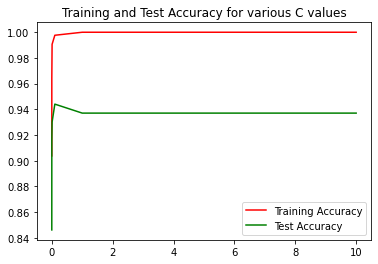

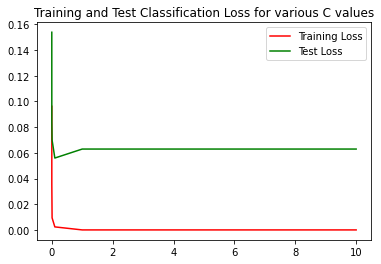

In [15]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
train_logreg2_coeff = []
test_logreg2_coeff = []
precision_list_train = [] 
recall_list_train = []
fscore_list_train = []
precision_list_test = [] 
recall_list_test = []
fscore_list_test = []
classification_loss_train = [] 
classification_loss_test = []

for c in cVals:
    logreg2_model(c, X_transformed_train1, Y_train, X_transformed_test1, Y_test)
    
#Plotting train and test accuracy    
plt.plot(c_logreg2,acc_train_logreg2,'r')
plt.plot(c_logreg2,acc_test_logreg2,'g')
plt.title("Training and Test Accuracy for various C values")
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

#Plotting train and test loss
plt.plot(c_logreg2,classification_loss_train,'r')
plt.plot(c_logreg2,classification_loss_test,'g')
plt.title("Training and Test Classification Loss for various C values")
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# Support Vector Machines

# SVM Using Linear Kernel

Train Accuracy = 0.650235
Test Accuracy = 0.622378
Train Accuracy = 0.950704
Test Accuracy = 0.916084
Train Accuracy = 0.974178
Test Accuracy = 0.951049
Train Accuracy = 0.990610
Test Accuracy = 0.951049
Train Accuracy = 0.995305
Test Accuracy = 0.951049
Train Accuracy = 0.995305
Test Accuracy = 0.951049


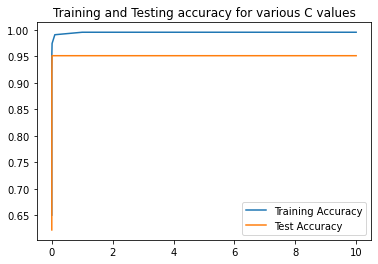

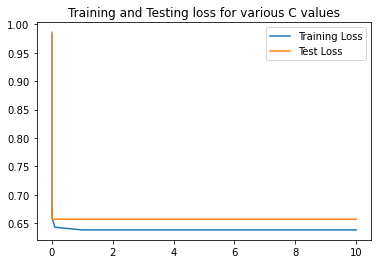

In [16]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
train_svm_coeff = []
test_svm_coeff = []
svm_loss_train = []
svm_loss_test = []
from sklearn import svm
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train,Y_train)
    acc_train_svm_linear.append(acc_train)
    svm_loss_train.append(hinge_loss(Y_train_svm,Yhat_svc_linear_train))
    #Many coefficients choose to not list in write-up
    train_svm_coeff.append(svc_linear.coef_)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test,Y_test)
    acc_test_svm_linear.append(acc_test)
    svm_loss_test.append(hinge_loss(Y_test_svm,Yhat_svc_linear_test))
    #Many coefficients choose to not list in write-up
    test_svm_coeff.append(svc_linear.coef_)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
    
for c in cVals:
    svm_linear(c)
plt.plot(c_svm_linear,acc_train_svm_linear)
plt.plot(c_svm_linear,acc_test_svm_linear)
plt.title('Training and Testing accuracy for various C values')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()
plt.plot(c_svm_linear,svm_loss_train)
plt.plot(c_svm_linear,svm_loss_test)
plt.title('Training and Testing loss for various C values')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()
#print(train_svm_coeff)
#print(test_svm_coeff)

# SVM Using Linear Kernel with L2 Regularization

Train Accuracy = 0.943662
Test Accuracy = 0.930070
Train Accuracy = 0.971831
Test Accuracy = 0.965035
Train Accuracy = 0.990610
Test Accuracy = 0.965035
Train Accuracy = 0.995305
Test Accuracy = 0.944056
Train Accuracy = 0.995305
Test Accuracy = 0.958042
Train Accuracy = 0.990610
Test Accuracy = 0.944056


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


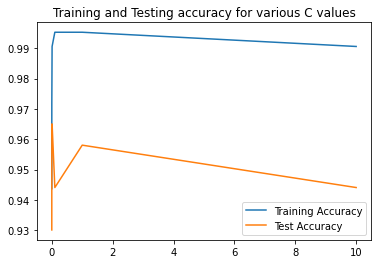

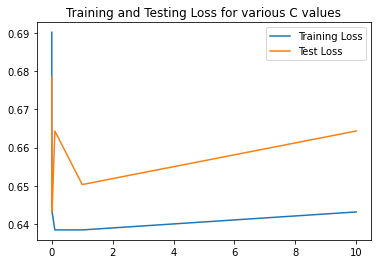

In [17]:
from sklearn.svm import LinearSVC
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
train_svm_coeff = []
test_svm_coeff = []
svm_loss_train = []
svm_loss_test = []
from sklearn import svm
def svm_linear_l1(c):
    svc_linear = LinearSVC(C = c)
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train,Y_train)
    acc_train_svm_linear.append(acc_train)
    svm_loss_train.append(hinge_loss(Y_train_svm,Yhat_svc_linear_train))
    #Many coefficients choose to not list in write-up
    train_svm_coeff.append(svc_linear.coef_)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test,Y_test)
    acc_test_svm_linear.append(acc_test)
    svm_loss_test.append(hinge_loss(Y_test_svm,Yhat_svc_linear_test))
    #Many coefficients choose to not list in write-up
    test_svm_coeff.append(svc_linear.coef_)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
    
for c in cVals:
    svm_linear_l1(c)
plt.plot(c_svm_linear,acc_train_svm_linear)
plt.plot(c_svm_linear,acc_test_svm_linear)
plt.title('Training and Testing accuracy for various C values')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()
plt.plot(c_svm_linear,svm_loss_train)
plt.plot(c_svm_linear,svm_loss_test)
plt.title('Training and Testing Loss for various C values')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# SVM Using Radial Basis Function Kernel

Train Accuracy = 0.633803
Test Accuracy = 0.608392
Train Accuracy = 0.633803
Test Accuracy = 0.608392
Train Accuracy = 0.633803
Test Accuracy = 0.608392
Train Accuracy = 0.957746
Test Accuracy = 0.930070
Train Accuracy = 0.990610
Test Accuracy = 0.951049
Train Accuracy = 0.997653
Test Accuracy = 0.944056


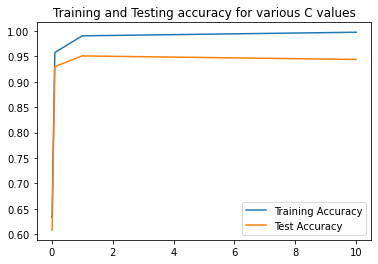

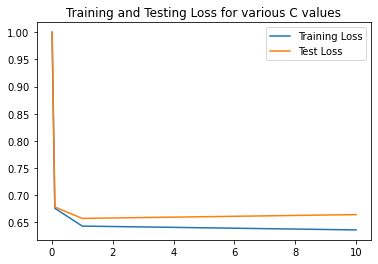

In [18]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
svm_loss_train = []
svm_loss_test = []

def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    svc_rbf.fit(X_train,Y_train)
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train,Y_train)
    acc_train_svm_rbf.append(acc_train)
    svm_loss_train.append(hinge_loss(Y_train_svm,Yhat_svc_rbf_train))
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test,Y_test)
    acc_test_svm_rbf.append(acc_test)
    svm_loss_test.append(hinge_loss(Y_test_svm,Yhat_svc_rbf_test))
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_rbf.append(c)
for c in cVals:
    svm_rbf(c)
plt.plot(c_svm_rbf,acc_train_svm_rbf)
plt.plot(c_svm_rbf,acc_test_svm_rbf)
plt.title('Training and Testing accuracy for various C values')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()
plt.plot(c_svm_rbf,svm_loss_train)
plt.plot(c_svm_rbf,svm_loss_test)
plt.title('Training and Testing Loss for various C values')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# SVM using Polynomial Kernel

Train Accuracy = 0.633803
Test Accuracy = 0.608392
Train Accuracy = 0.650235
Test Accuracy = 0.622378
Train Accuracy = 0.708920
Test Accuracy = 0.713287
Train Accuracy = 0.854460
Test Accuracy = 0.818182
Train Accuracy = 0.920188
Test Accuracy = 0.867133
Train Accuracy = 0.978873
Test Accuracy = 0.923077


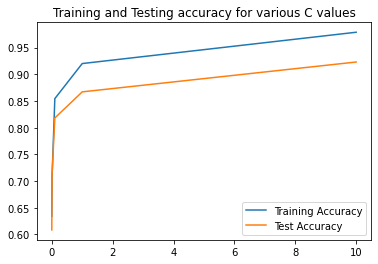

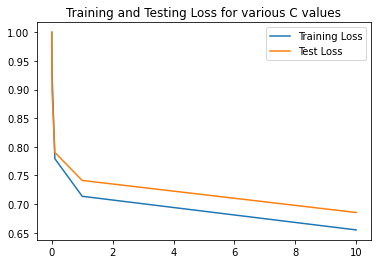

In [19]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
svm_loss_train = []
svm_loss_test = []

def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)

    svc_polynomial.fit(X_train,Y_train)
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train,Y_train)
    acc_train_svm_poly.append(acc_train)
    svm_loss_train.append(hinge_loss(Y_train_svm,Yhat_svc_poly_train))
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test,Y_test)
    acc_test_svm_poly.append(acc_test)
    svm_loss_test.append(hinge_loss(Y_test_svm,Yhat_svc_poly_test))
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)
    
#cVals = np.geomspace(0.000001, 0.001, 5)
cVals= [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_polynomial(c)

plt.plot(c_svm_poly,acc_train_svm_poly)
plt.plot(c_svm_poly,acc_test_svm_poly)
plt.title('Training and Testing accuracy for various C values')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()
plt.plot(c_svm_poly,svm_loss_train)
plt.plot(c_svm_poly,svm_loss_test)
plt.title('Training and Testing Loss for various C values')
plt.legend(['Training Loss', 'Test Loss'], loc='upper right')
plt.show()

# Neural Network

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


# Neural Network with no hidden layers

In [21]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 1s 3ms/sample - loss: 0.5062 - accuracy: 0.7418 - val_loss: 0.2792 - val_accuracy: 0.8951
Epoch 2/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.2063 - accuracy: 0.9343 - val_loss: 0.1947 - val_accuracy: 0.9510
Epoch 3/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.1532 - accuracy: 0.9390 - val_loss: 0.1641 - val_accuracy: 0.9580
Epoch 4/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.1287 - accuracy: 0.9601 - val_loss: 0.1457 - val_accuracy: 0.9580
Epoch 5/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.1131 - accuracy: 0.9577 - val_loss: 0.1345 - val_accuracy: 0.9650
Epoch 6/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.1020 - accuracy: 0.9648 - val_loss: 0.1262 - val_accuracy: 0.9650
Epoch 7/50
426/426 [==============================] - 1s 1ms/sample - loss: 0.0939 - accur

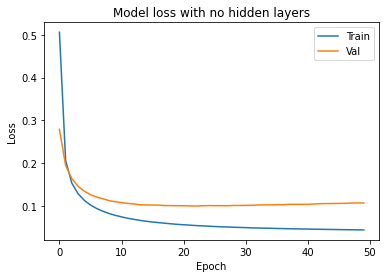

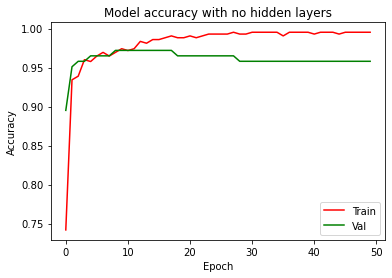

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with no hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with no hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Network with One hidden layer

In [23]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 1s 3ms/sample - loss: 0.4257 - accuracy: 0.8099 - val_loss: 0.2576 - val_accuracy: 0.9371
Epoch 2/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.1751 - accuracy: 0.9577 - val_loss: 0.1808 - val_accuracy: 0.9650
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.1227 - accuracy: 0.9671 - val_loss: 0.1447 - val_accuracy: 0.9650
Epoch 4/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0960 - accuracy: 0.9765 - val_loss: 0.1250 - val_accuracy: 0.9720
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0798 - accuracy: 0.9836 - val_loss: 0.1145 - val_accuracy: 0.9720
Epoch 6/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0695 - accuracy: 0.9906 - val_loss: 0.1096 - val_accuracy: 0.9720
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0626 - accur

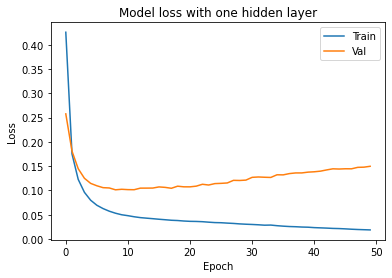

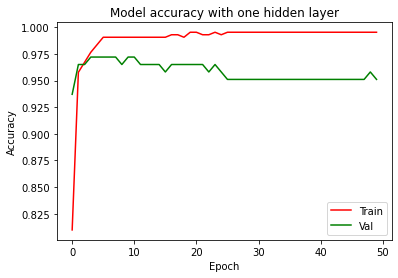

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with one hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with one hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Network with two hidden layers (ReLu activation)

In [25]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 2s 4ms/sample - loss: 0.4802 - accuracy: 0.8333 - val_loss: 0.3332 - val_accuracy: 0.9091
Epoch 2/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.2201 - accuracy: 0.9624 - val_loss: 0.2046 - val_accuracy: 0.9510
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.1345 - accuracy: 0.9695 - val_loss: 0.1466 - val_accuracy: 0.9650
Epoch 4/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0970 - accuracy: 0.9812 - val_loss: 0.1245 - val_accuracy: 0.9720
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0763 - accuracy: 0.9836 - val_loss: 0.1122 - val_accuracy: 0.9720
Epoch 6/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0649 - accuracy: 0.9836 - val_loss: 0.1142 - val_accuracy: 0.9650
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0563 - accur

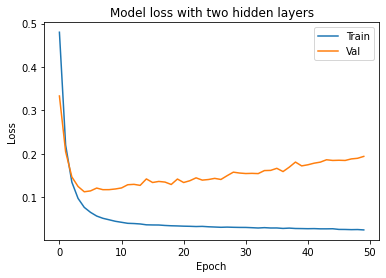

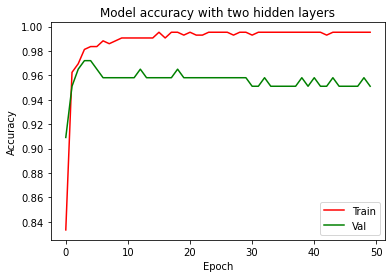

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with two hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with two hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Networks with ReLu activation on the hidden layers

# Neural Network with one hidden layer (ReLu activation)

In [27]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 2s 4ms/sample - loss: 0.2839 - accuracy: 0.8944 - val_loss: 0.1804 - val_accuracy: 0.9510
Epoch 2/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.1028 - accuracy: 0.9648 - val_loss: 0.1316 - val_accuracy: 0.9650
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0756 - accuracy: 0.9742 - val_loss: 0.1163 - val_accuracy: 0.9720
Epoch 4/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0620 - accuracy: 0.9836 - val_loss: 0.1080 - val_accuracy: 0.9790
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0530 - accuracy: 0.9883 - val_loss: 0.1069 - val_accuracy: 0.9720
Epoch 6/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0468 - accuracy: 0.9883 - val_loss: 0.1069 - val_accuracy: 0.9650
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0418 - accur

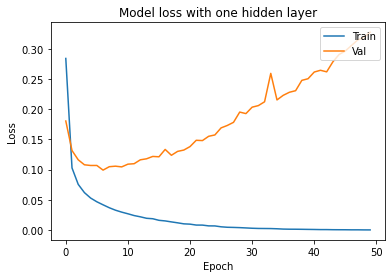

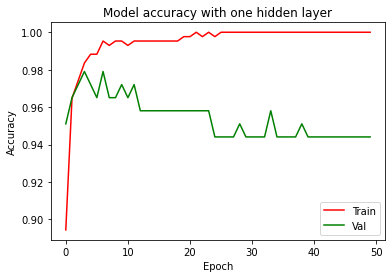

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with one hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with one hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Network with two hidden layers

In [29]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 2s 5ms/sample - loss: 0.2841 - accuracy: 0.8850 - val_loss: 0.1635 - val_accuracy: 0.9580
Epoch 2/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0953 - accuracy: 0.9671 - val_loss: 0.1212 - val_accuracy: 0.9580
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0655 - accuracy: 0.9836 - val_loss: 0.1117 - val_accuracy: 0.9720
Epoch 4/50
426/426 [==============================] - 1s 3ms/sample - loss: 0.0520 - accuracy: 0.9859 - val_loss: 0.1071 - val_accuracy: 0.9720
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.1194 - val_accuracy: 0.9650
Epoch 6/50
426/426 [==============================] - 1s 3ms/sample - loss: 0.0351 - accuracy: 0.9906 - val_loss: 0.1248 - val_accuracy: 0.9580
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.0332 - accur

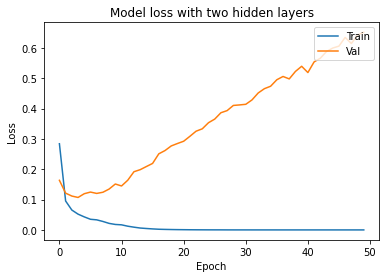

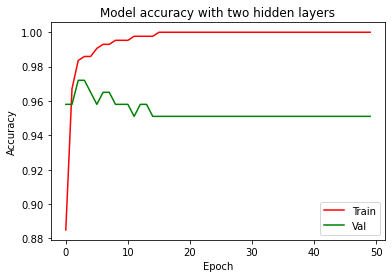

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with two hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with two hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Overfitting in the Neural Networks with both activation functions. Adding regularization to models with sigmoid functions

# Neural Network with one hidden layer and L1 Regularization

In [31]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid, kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 2s 4ms/sample - loss: 1.0302 - accuracy: 0.8169 - val_loss: 0.6640 - val_accuracy: 0.9371
Epoch 2/50
426/426 [==============================] - 1s 3ms/sample - loss: 0.5095 - accuracy: 0.9554 - val_loss: 0.4772 - val_accuracy: 0.9161
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.4078 - accuracy: 0.9507 - val_loss: 0.4228 - val_accuracy: 0.9231
Epoch 4/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.3693 - accuracy: 0.9601 - val_loss: 0.3996 - val_accuracy: 0.9231
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.3465 - accuracy: 0.9554 - val_loss: 0.3775 - val_accuracy: 0.9301
Epoch 6/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.3286 - accuracy: 0.9601 - val_loss: 0.3630 - val_accuracy: 0.9301
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.3152 - accur

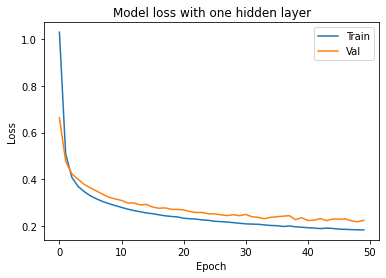

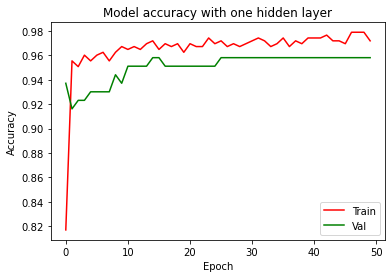

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with one hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with one hidden layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Neural Network with two hidden layers and L1 Regularization

In [33]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid,kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid,kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Train on 426 samples, validate on 143 samples
Epoch 1/50
426/426 [==============================] - 2s 4ms/sample - loss: 1.3155 - accuracy: 0.7183 - val_loss: 0.8910 - val_accuracy: 0.7832
Epoch 2/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.7770 - accuracy: 0.6854 - val_loss: 0.7383 - val_accuracy: 0.6084
Epoch 3/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.6920 - accuracy: 0.6338 - val_loss: 0.6912 - val_accuracy: 0.6084
Epoch 4/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.6559 - accuracy: 0.7183 - val_loss: 0.6665 - val_accuracy: 0.6084
Epoch 5/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.6283 - accuracy: 0.7559 - val_loss: 0.6402 - val_accuracy: 0.8531
Epoch 6/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.6025 - accuracy: 0.9249 - val_loss: 0.6232 - val_accuracy: 0.8392
Epoch 7/50
426/426 [==============================] - 1s 2ms/sample - loss: 0.5777 - accur

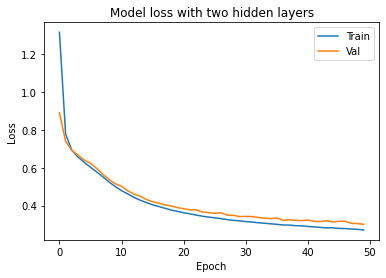

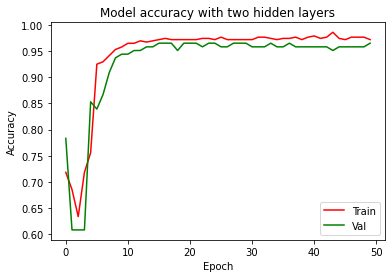

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss with two hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.title('Model accuracy with two hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()